# Water Hydration Level Classification💧
* **Using CatBoost-Classifier**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('/kaggle/input/daily-water-intake-and-hydration-patterns-dataset/Daily_Water_Intake.csv')
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


# Analyzing Data
* **Patterns (Distribution-Plots,Null values)**
* **Numerical Feature Correlation**

In [3]:
df.isnull().sum() # Checking Null Values

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

In [4]:
df.shape

(30000, 7)

In [5]:
df.describe()

,Age,Weight (kg),Daily Water Intake (liters)
count,30000.000000,30000.00000,30000.000000
mean,43.467667,76.84860,2.852444
std,14.998940,18.74494,0.835537
min,18.000000,45.00000,1.500000
25%,30.000000,61.00000,2.220000
50%,43.000000,77.00000,2.830000
75%,56.000000,93.00000,3.440000
max,69.000000,109.00000,5.430000


<Axes: >

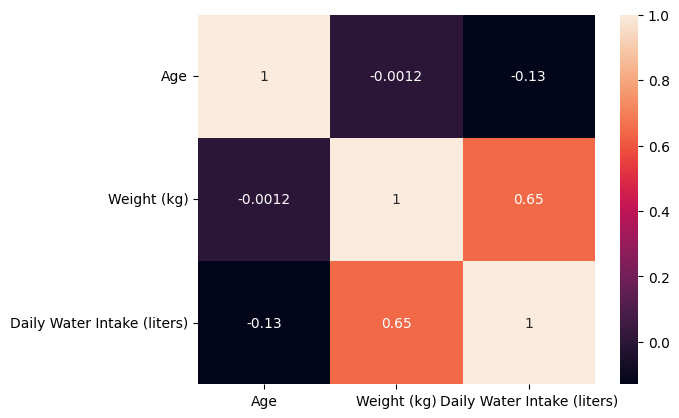

In [6]:
# Correlation Matrix
num=['Age','Weight (kg)','Daily Water Intake (liters)']
cor=df[num].corr()
sns.heatmap(cor,annot=True)

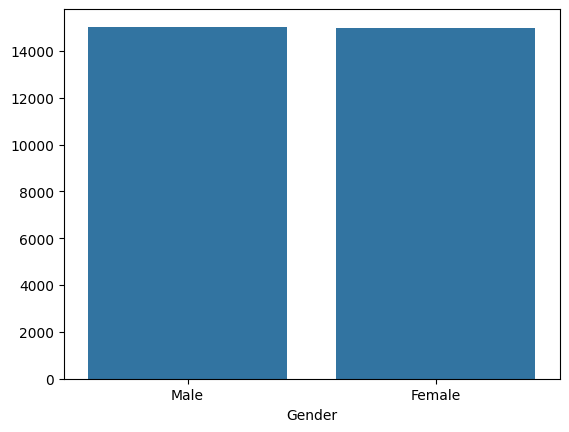

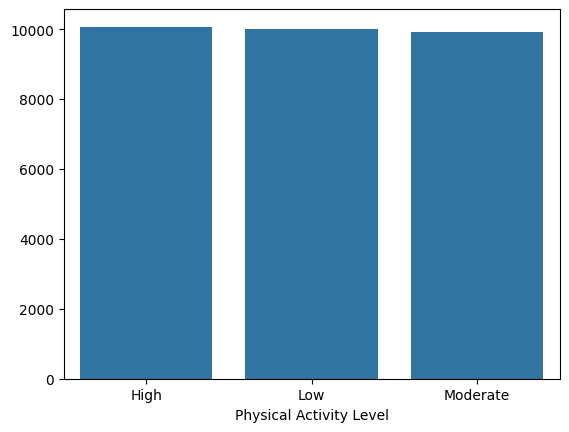

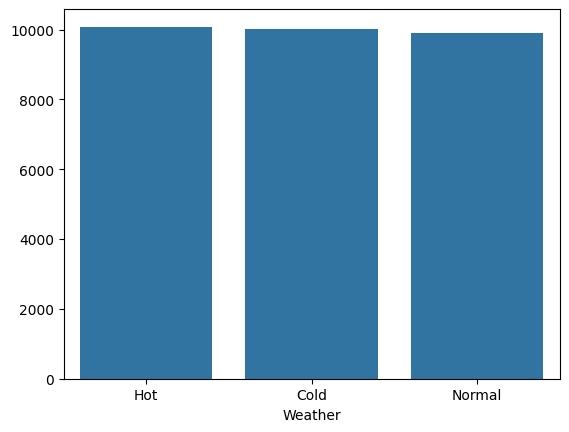

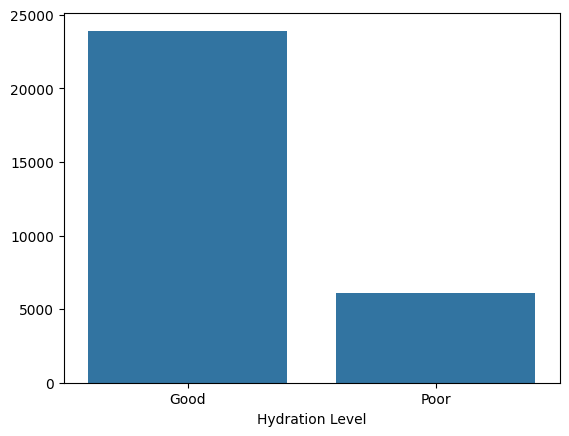

In [7]:
arr=['Gender','Physical Activity Level','Weather','Hydration Level']
for i in arr:
    c=df[i].value_counts()
    sns.barplot(x=c.index,y=c.values)
    plt.show()

# Classification Model 
* **Test Train Split**
* **Modeling**
* **Evaluation (Classification Report)**

In [8]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features & target
X=df.drop('Hydration Level',axis=1)
y=df['Hydration Level']

# Identify categorical columns by name
cat_features=['Gender', 'Physical Activity Level', 'Weather']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42, stratify=y
)

model = CatBoostClassifier(
    iterations=600,
    depth=6,
    learning_rate=0.04,
    loss_function='Logloss',
    class_weights=[1, 3],
    verbose=0,
    random_seed=42
    
)

model.fit(
    X_train, y_train,
    cat_features=cat_features
)

y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       1.00      0.99      1.00      4783
        Poor       0.97      1.00      0.98      1217

    accuracy                           0.99      6000
   macro avg       0.98      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



# Conclusion🔚
## The CatBoost model achieves 99% accuracy with strong precision, recall, and F1-scores across both classes.
- **Notably, the Poor hydration class shows 100% recall, ensuring individuals at risk of dehydration are correctly identified.**
-  **Overall, the results indicate a well-balanced and reliable classification model suitable for hydration analysis.**